# Model Selection 

Model selection -> optimizing hyperparameters and explore the issue of whether the model requires more data to perform better

## Validation Curve

Creating a validation curve is one way to determine an appropriate value for a hyperparameter. A validation curve is a plot that shows how the model performance responds to changes in the hyperparameter's value. The chart shows both the training data and the validation data. The validation scores allow us to infer how the model would respond to unseen data. Typically, we would choose a hyperparameter that maximizes the validation score. 


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
X = pd.read_excel('X.xls')
y = pd.read_excel('y.xls')
y_train = pd.read_excel('y_train.xls')
X_train = pd.read_excel('X_train.xls')
y_test = pd.read_excel('y_test.xls')
X_test = pd.read_excel('X_test.xls')

In [4]:
data = [X,y,X_train,y_train,X_test,y_test]
for d in data:
    d.drop(columns = 'Unnamed: 0', inplace = True)

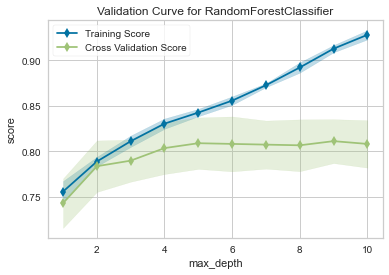

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [7]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import RandomForestClassifier


fig, ax = plt.subplots(figsize = (6,4))
vc_viz = ValidationCurve(
                        RandomForestClassifier(n_estimators = 100),
                        param_name = 'max_depth',
                        param_range = np.arange(1, 11),
                        cv = 10,
                        n_jobs = -1)

vc_viz.fit(X,y)
vc_viz.poof()

The `ValidationCurve` class supports a scoring parameter. The parameter can be a custom function or one of the following options, depending on the task. 

__Classification scoring options include__: accuracy, average_precision, f1, f1_micro, f1_macro, f1_weighted, f1_samples, neg_log_loss, precision, recall, and roc_auc

__Clustering scoring options__: adjusted_mutual_info_score, adjusted_rand_score, completeness_score, fowlkesmallows_score, homogeneity_score, mutual_info_score, homogeneity_score, mutual_info_score, normalized_mutual_info_score and v_measure_score

__Regression scoring options__: explained_variance, neg_mean_absolute_error, neg_mean_sqaured_error, neg_mean_sqaured_log_error, neg_median_absolute_error, and r2

## Learning Curve

To select theb est model for your project, how much data do you need ? A learning curve can help us answer the question. This curve plots the training and cross-validation score as we create models with more samples. If the cross-validation score conitunes to rise, for example, that could indicate that moredata would help the model perform better. 


The following visualization shows a validation curve and also helps us explore bias and variance in our model. If there is variability (a large shaded area) in the training score, then the model suffers from variance error and is too complicated (overfit), Anotehr indication that the model is overfit is that the performance of the validation set is much worse than the training set

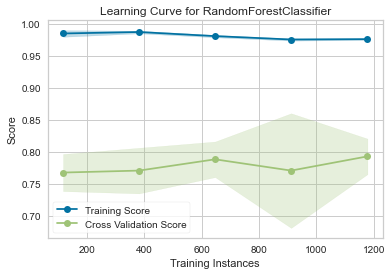

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [8]:
from yellowbrick.model_selection import LearningCurve 

fig, ax = plt.subplots(figsize = (6,4))
lc3_viz = LearningCurve(RandomForestClassifier(n_estimators = 100),
                       cv = 10)
lc3_viz.fit(X,y)
lc3_viz.poof()